In [1]:
import numpy as np
import scipy as scipy

In [2]:
def initial_matrix(N: int, phi_1: float, phi_2: float, theta_1: float, theta_2: float):
    # the initial rectangle area on the spherical coordinte is pi * 2pi
    output = np.zeros((N, 2*N))
    # phi and theta should in pi * 2pi
    if(phi_1 > 2*np.pi or phi_2 > 2*np.pi or theta_1 > np.pi or theta_2 > np.pi):
        raise ValueError("out of bound")
        
    if(phi_1 > phi_2):
        raise ValueError("phi_1 should be smaller than phi_2") 
    if(theta_1 > theta_2):
        raise ValueError("theta_1 should be smaller than theta_2")  
        
    a_1 = int(N * theta_1 / np.pi)
    a_2 = int(N * theta_2 / np.pi)
    b_1 = int(N * phi_1 / (2 * np.pi))
    b_2 = int(N * phi_2 / (2 * np.pi))
    
    output[a_1:a_2, b_1:b_2] = 1
    
    return output

In [3]:
import pyshtools as pyshtools


In [46]:
agrid = initial_matrix(500, 1, 2, 1, 2)

In [47]:
grid = pyshtools.SHGrid.from_array(agrid)

In [48]:
clm = grid.expand()

In [49]:
# grid_reco = clm.expand(lmax=lmax)

In [50]:
from pyshtools.shtools import SHExpandDH, MakeGridDH

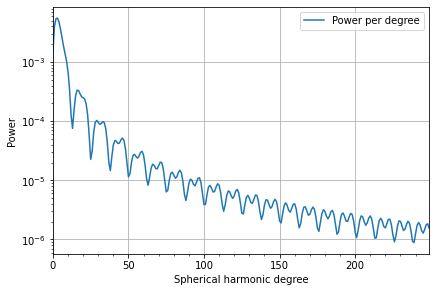

In [51]:
fig, ax = clm.plot_spectrum(show=False) 

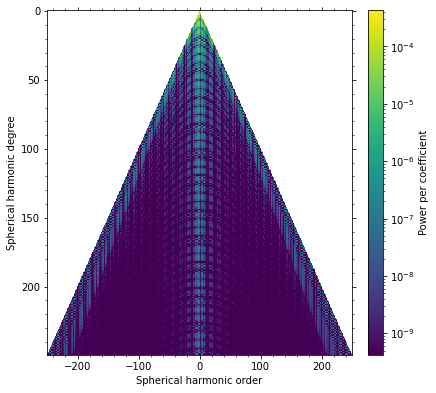

In [52]:
fig, ax = clm.plot_spectrum2d(cmap_rlimits=(1.e-7, 0.1),
                              show=False)

In [53]:
coeffs = clm.to_array()

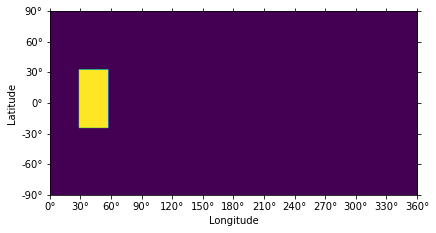

In [12]:
fig, ax = grid.plot(show=False)

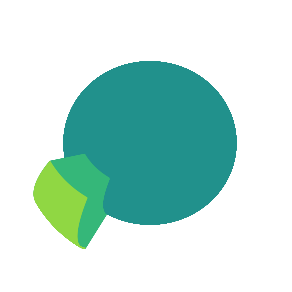

In [13]:
fig, ax = grid.plot3d(elevation=60,
                      azimuth=90,
                      scale=2,
                      cmap_limits=[-1.5, 1.5],
                      show=False)

In [14]:
## Change a t value

In [15]:

def change_t(odd_coeffs: np.ndarray, t: int) -> np.ndarray:
    new_coeffs = odd_coeffs
    row = len(odd_coeffs[0])
    column = len(odd_coeffs[0][0])
    for k in range(0, 2):
        for i in range(row):
            for j in range(column):
                new_coeffs[k][i][j] = odd_coeffs[k][i][j] * np.cos(t * i * (i+1))
    return new_coeffs

In [16]:
## t = pi / 10

In [17]:
new_coeffs_1 = change_t(coeffs, np.pi / 10)

In [18]:
## new SHCoeffs class from the new matrix 

In [19]:
new_SHCoeffs_class_1 = pyshtools.SHCoeffs.from_array(new_coeffs_1)

In [20]:
## Visualization of the Fourier coefficients

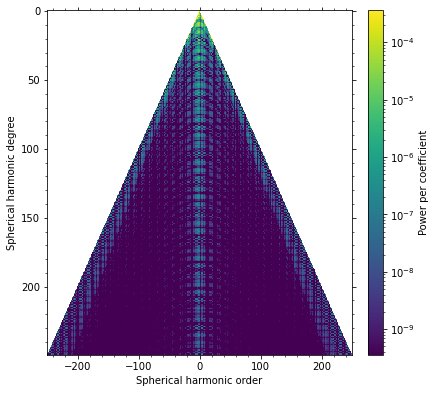

In [21]:
fig, ax = new_SHCoeffs_class_1.plot_spectrum2d(cmap_rlimits=(1.e-7, 0.1),
                              show=False)

In [22]:
## new SHgrid class from the new SHCoeffs class 

In [23]:
new_grid_1 = new_SHCoeffs_class_1.expand()

In [24]:
## Visualizations of the function

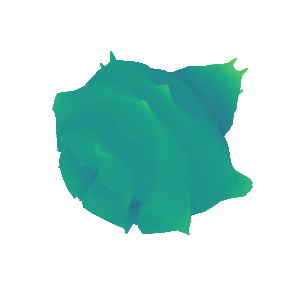

In [25]:
fig, ax = new_grid_1.plot3d(elevation=60,
                      azimuth=90,
                      scale=2,
                      cmap_limits=[-1.5, 1.5],
                      show=False)

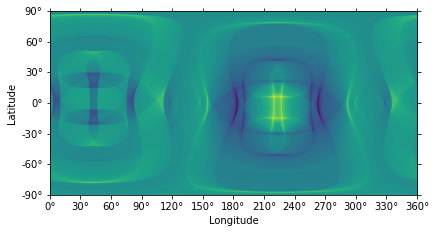

In [26]:
fig, ax = new_grid_1.plot(show=False)

In [55]:
## t = pi**2 / 10000

In [56]:
new_coeffs_2= change_t(coeffs, np.pi**2 / 100)

In [57]:
new_SHCoeffs_class_2 = pyshtools.SHCoeffs.from_array(new_coeffs_2)

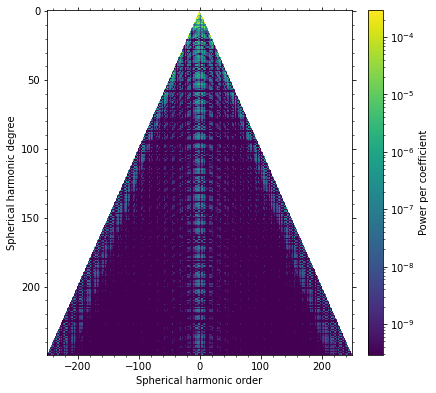

In [58]:
new_grid_2 = new_SHCoeffs_class_2.expand()
fig, ax = new_SHCoeffs_class_2.plot_spectrum2d(cmap_rlimits=(1.e-7, 0.1),
                              show=False)

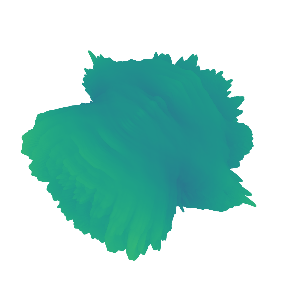

In [59]:
fig_1, ax_1 = new_grid_2.plot3d(elevation=60,
                      azimuth=90,
                      scale=2,
                      cmap_limits=[-1.5, 1.5],
                      show=False)

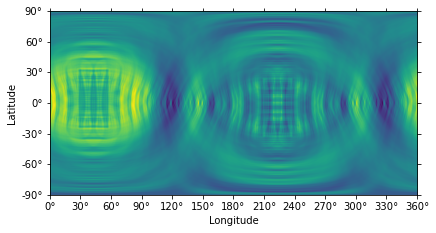

In [60]:
fig_1, ax_1 = new_grid_2.plot(show=False)